In [14]:
import numpy as np 
from random import randint # generate random integer  
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler 

In [15]:
train_labels = []
train_samples = []

Example Data 

Expperimental drug was tested on 2100 individuals between 13 to 100 years of
age
Half the participants are under 65
around 95% of participants under 65 experienced no side effects 
95% of participants over 65 experienced side effects

In [16]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects 
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects 
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects 
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    
    
    

In [17]:
print(len(train_samples),train_samples[:5])
print(len(train_labels),train_labels[:5])

2100 [15, 74, 61, 87, 57]
2100 [1, 0, 1, 0, 1]


In [18]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [22]:
# scalling the feature into standard values 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_train_samples[:5]

array([[0.67816092],
       [0.77011494],
       [0.5862069 ],
       [0.66666667],
       [0.04597701]])

### Create Artificial Neural Network 

In [27]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential # it goes one layer to next layer to the next layer - like sequnce manner
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam # Adam usually assigned for huge data 
from tensorflow.keras.metrics import categorical_crossentropy

In [29]:
model = Sequential([ # we one layer to next
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Denseh
    (units=2, activation='softmax')
])

### NOTE 
Find out how what is <br>
    - activation function <br>
    - why we using it<br>
    - different types of activation function <br>
    - mathematics behind is 
    

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, shuffle=True, epochs=30, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.3656 - accuracy: 0.8984 - val_loss: 0.3560 - val_accuracy: 0.8905
Epoch 2/30
189/189 - 0s - loss: 0.3495 - accuracy: 0.9021 - val_loss: 0.3411 - val_accuracy: 0.8905
Epoch 3/30
189/189 - 0s - loss: 0.3354 - accuracy: 0.9085 - val_loss: 0.3285 - val_accuracy: 0.9048
Epoch 4/30
189/189 - 0s - loss: 0.3237 - accuracy: 0.9138 - val_loss: 0.3180 - val_accuracy: 0.9048
Epoch 5/30
189/189 - 0s - loss: 0.3138 - accuracy: 0.9175 - val_loss: 0.3093 - val_accuracy: 0.9190
Epoch 6/30
189/189 - 0s - loss: 0.3054 - accuracy: 0.9222 - val_loss: 0.3015 - val_accuracy: 0.9190
Epoch 7/30
189/189 - 0s - loss: 0.2985 - accuracy: 0.9212 - val_loss: 0.2953 - val_accuracy: 0.9190
Epoch 8/30
189/189 - 0s - loss: 0.2927 - accuracy: 0.9275 - val_loss: 0.2899 - val_accuracy: 0.9286
Epoch 9/30
189/189 - 0s - loss: 0.2877 - accuracy: 0.9312 - val_loss: 0.2857 - val_accuracy: 0.9286
Epoch 10/30
189/189 - 0s - loss: 0.2835 - accuracy: 0.9312 - val_loss: 0.2824 - val_accuracy: 0.9286

#### Building a test set and predicting

In [35]:
test_labels = []
test_samples = []

In [38]:
# Preparing data
for i in range(50):
    # The 5% of younger individuals who did experience side effects 
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects 
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects 
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)
    
    
    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

# scalling the feature into standard values 
scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))


In [40]:
predictions = model.predict(
    x=scaled_test_samples,
    batch_size=10,
    verbose=0
)

In [41]:
# rounding predictions to get 0 or 1
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:5]

array([1, 1, 1, 1, 0], dtype=int64)

<h2> Confusion Matrices for accuracy check <h2>

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [44]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [49]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This funciton prints and plots the confusion matrix
    Normalization can be applied by setting `normalize=True`
    """
    
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [50]:
cm_plot_labels = ['no_side_effects', 'had side effects']

Confusion matrix, without normalization
[[1968  132]
 [  98 2002]]


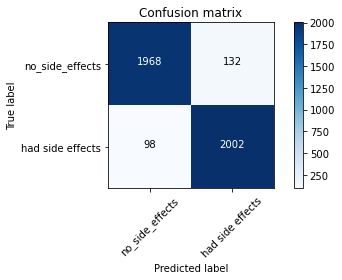

In [51]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')